In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos

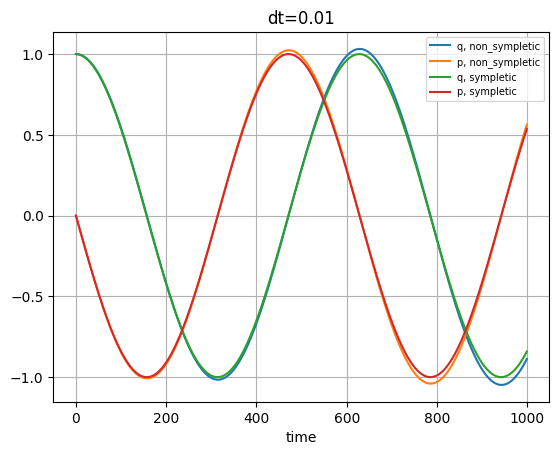

In [2]:
dt=0.01
tmax=10
Nt=int(tmax/dt)
tarr = np.array([i*dt for i in range(Nt)])

non_sym_M = np.array([
    [1, dt],
    [-dt, 1]
])

sym_M = np.array([
    [1-dt**2, dt],
    [-dt, 1]
])


q0 = np.array([1,0])
non_sym_q = np.zeros((Nt, 2))
sym_q = np.zeros((Nt, 2))
non_sym_q[0] = np.copy(q0)
sym_q[0] = np.copy(q0)

for i in range(Nt-1):
    non_sym_q[i+1] = np.matmul(non_sym_M, non_sym_q[i])
    sym_q[i + 1] = np.matmul(sym_M, sym_q[i])

plt.plot(non_sym_q[:,0], label="q, non_sympletic")
plt.plot(non_sym_q[:, 1], label="p, non_sympletic")
plt.plot(sym_q[:,0], label="q, sympletic")
plt.plot(sym_q[:,1], label="p, sympletic")
plt.grid()
plt.xlabel("time")
plt.title(f"dt={dt}")
plt.legend(fontsize=7);


non_sym_q2 = np.copy(non_sym_q)
sym_q2 = np.copy(sym_q)
tarr2 = np.copy(tarr)
exact_q2 = np.array([cos(i) for i in range(Nt)])
exact_p2 = np.array([-sin(i) for i in range(Nt)])

total_err_nonsym2 = 0
total_err_sym2 = 0
cum_err_nonsym2 = np.zeros(Nt)
cum_err_sym2 = np.zeros(Nt)
for i in range(Nt):
    total_err_nonsym2 += abs(exact_q2[i] - non_sym_q2[i][0]) + abs(exact_p2[i] - non_sym_q2[i][1])
    cum_err_nonsym2[i]=total_err_nonsym2
    total_err_sym2 += abs(exact_q2[i] - sym_q2[i][0]) + abs(
        exact_p2[i] - sym_q2[i][1]
    )
    cum_err_sym2[i]=total_err_sym2

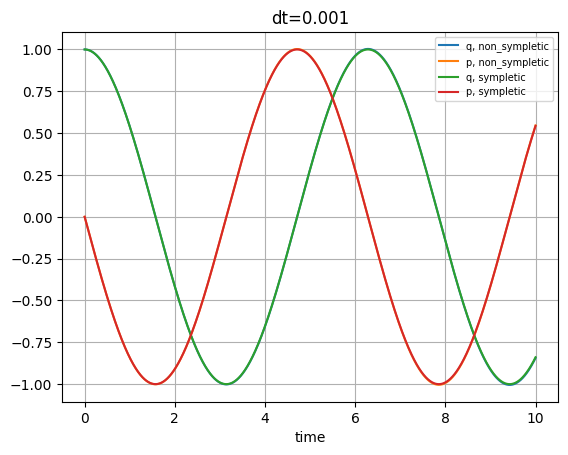

In [3]:
dt = 0.001
tmax = 10
Nt = int(tmax / dt)
tarr = np.array([i * dt for i in range(Nt)])

non_sym_M = np.array([[1, dt], [-dt, 1]])

sym_M = np.array([[1 - dt**2, dt], [-dt, 1]])


q0 = np.array([1, 0])
non_sym_q = np.zeros((Nt, 2))
sym_q = np.zeros((Nt, 2))
non_sym_q[0] = np.copy(q0)
sym_q[0] = np.copy(q0)

for i in range(Nt - 1):
    non_sym_q[i + 1] = np.matmul(non_sym_M, non_sym_q[i])
    sym_q[i + 1] = np.matmul(sym_M, sym_q[i])

plt.plot(tarr,non_sym_q[:, 0], label="q, non_sympletic")
plt.plot(tarr, non_sym_q[:, 1], label="p, non_sympletic")
plt.plot(tarr, sym_q[:, 0], label="q, sympletic")
plt.plot(tarr, sym_q[:, 1], label="p, sympletic")
plt.grid()
plt.xlabel("time")
plt.title(f"dt={dt}")
plt.legend(fontsize=7);


non_sym_q3 = np.copy(non_sym_q)
sym_q3 = np.copy(sym_q)
tarr3 = np.copy(tarr)
exact_q3 = np.array([cos(i) for i in range(Nt)])
exact_p3 = np.array([-sin(i) for i in range(Nt)])

total_err_nonsym3 = 0
total_err_sym3 = 0
cum_err_nonsym3 = np.zeros(Nt)
cum_err_sym3 = np.zeros(Nt)
for i in range(Nt):
    total_err_nonsym3 += abs(exact_q3[i] - non_sym_q3[i][0]) + abs(
        exact_p3[i] - non_sym_q3[i][1]
    )
    cum_err_nonsym3[i]=total_err_nonsym3
    total_err_sym3 += abs(exact_q3[i] - sym_q3[i][0]) + abs(exact_p3[i] - sym_q3[i][1])
    cum_err_sym3[i] = total_err_sym3

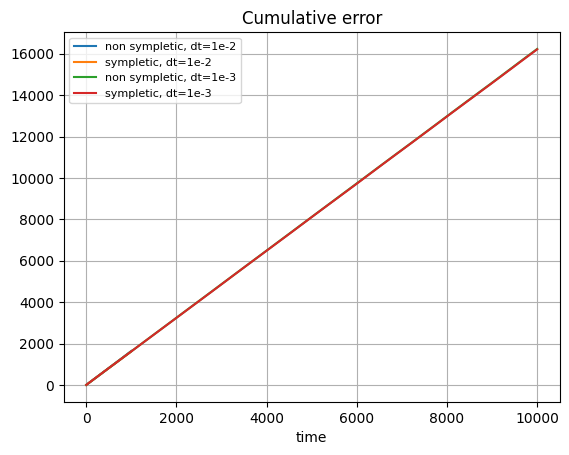

In [4]:
plt.plot(cum_err_nonsym2, label="non sympletic, dt=1e-2")
plt.plot(cum_err_sym2, label="sympletic, dt=1e-2")
plt.plot(cum_err_nonsym3, label="non sympletic, dt=1e-3")
plt.plot(cum_err_sym3, label="sympletic, dt=1e-3")
plt.xlabel("time")
plt.grid()
plt.title("Cumulative error")
plt.legend(loc="upper left", fontsize=8);

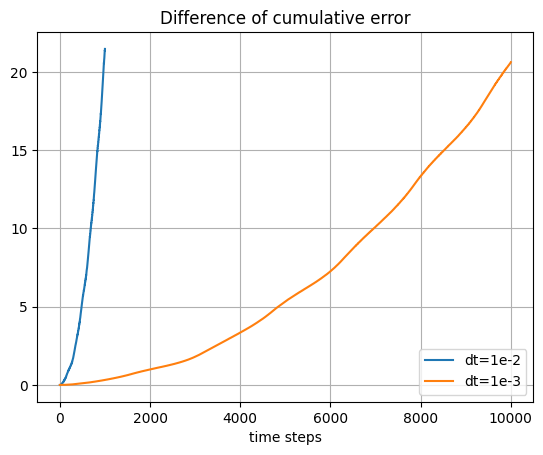

In [5]:
plt.plot(cum_err_nonsym2-cum_err_sym2, label="dt=1e-2")
plt.plot(cum_err_nonsym3-cum_err_sym3, label="dt=1e-3")
plt.xlabel("time steps")
plt.grid()
plt.title("Difference of cumulative error")
plt.legend(loc="lower right", fontsize=10);

In [6]:
def H(q, p):
    return p**2/2+q**2/2
def Hp(q,p,dt):
    return H(q,p)-q*p/2*dt

In [12]:
H_sym2 = np.array([H(q[0],q[1]) for q in sym_q2])
H_sym3 = np.array([H(q[0], q[1]) for q in sym_q3])
H_non_sym2 = np.array([H(q[0], q[1]) for q in non_sym_q2])
H_non_sym3 = np.array([H(q[0], q[1]) for q in non_sym_q3])


Hp_sym2 = np.array([Hp(q[0], q[1], 0.01) for q in sym_q2])
Hp_sym3 = np.array([Hp(q[0], q[1], 0.001) for q in sym_q3])
Hp_non_sym2 = np.array([Hp(q[0], q[1], 0.01) for q in non_sym_q2])
Hp_non_sym3 = np.array([Hp(q[0], q[1], 0.001) for q in non_sym_q3])

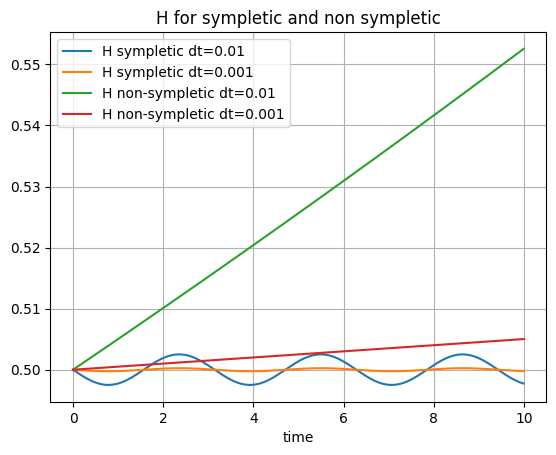

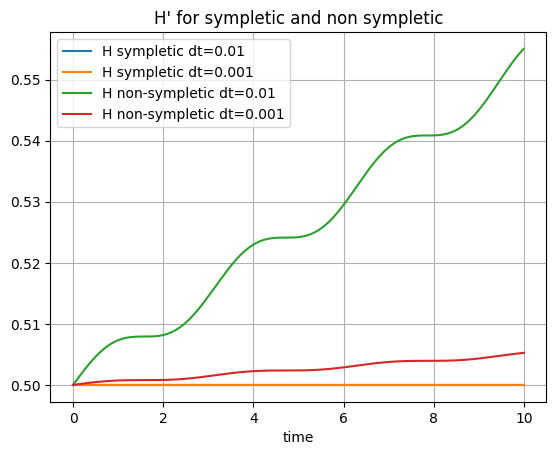

In [14]:
plt.plot(tarr2,H_sym2, label="H sympletic dt=0.01")
plt.plot(tarr3,H_sym3, label="H sympletic dt=0.001")
plt.plot(tarr2, H_non_sym2, label="H non-sympletic dt=0.01")
plt.plot(tarr3,H_non_sym3, label="H non-sympletic dt=0.001")
plt.grid()
plt.legend(loc="upper left")
plt.title("H for sympletic and non sympletic")
plt.xlabel("time")
plt.show();

plt.plot(tarr2, Hp_sym2, label="H sympletic dt=0.01")
plt.plot(tarr3, Hp_sym3, label="H sympletic dt=0.001")
plt.plot(tarr2, Hp_non_sym2, label="H non-sympletic dt=0.01")
plt.plot(tarr3, Hp_non_sym3, label="H non-sympletic dt=0.001")
plt.grid()
plt.legend(loc="upper left")
plt.title("H' for sympletic and non sympletic")
plt.xlabel("time")
plt.show()